# Shopify - Winter 2021 Data Science Intern Challenge
#### Completed by Marielle Alexander

#### Question 1) Shopify Sneaker Shops Data

a. The average order value measures the average dollar amount spent by a customer per order. Naturally, we expect AOV to give us insight into "typical" customer behavior. However, our AOV of $3,145.13 is clearly too high to be considered normal spending at Shopify Sneaker Shops. We need to determine if customers on the whole are buying large quantities of sneakers or if outliers are bringing the average up.

In order to get a snapshot of the spread in data, I printed summary statistics for order amount and total items per order. Table 1 (seen below) shows that orders range in amount from $90.00 to $704,000.00. There is a vast difference between customers who order a single shoe vs. 2,000 shoes. These extremely large orders might come from resellers rather than the typical end user. Already, we can start to see that a better tactic to understand customers could be evaluating separate averages for each spending category across the customer base. Table 1 also tells us that 75% of orders placed are less than $390.00. In terms of total items per order, 75% of orders contain 1 to 3 shoes. Our AOV, equivalent to 9 shoes per order, lies in the top 25% of data. 

To visualize the distribution of data, I included a scatter plot as well as boxplots with and without outliers in Figure 1. The scatterplot shows that much of the data is lower spenders, it's just unclear with outliers present what the low spending range is. In boxplot (i), again, the graph is dominated by outlier data so that we can't even see the box and whiskers. Following up, in boxplots (ii) and (iii) I reset the whiskers to capture 98% of the data and excluded points beyond that extremity to show the main portion of the boxplot. I also included the average (green arrow) in boxplot (iii), which lied far outside the upper limit of data, meaning it's in the top 2% of data. Clearly, the AOV is raised by outliers and it represents the behavior from the highest paying customers, not customers on the whole.

The AOV is still an important metric in terms of measuring revenue growth, which is essential to driving profitability. If we want to evaluate customer-based strategy performance though, we should focus on the majority of the customer base. We need a different metric that will measure central tendency in the data. In this case, the median would give a more distinct picture of typical customer behavior - 50% of customers spend above this value and 50% of customers spend below it.

b. For this dataset, I would report a median order value.

c. The median order value is $284.00 (Table 1).

#### Table 1: Summary Statistics for Order Amount and Total Items

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Sheet1.csv")

df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


#### Figure 1: Boxplot for Order Amount

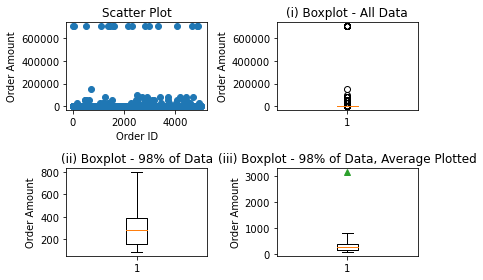

In [7]:
fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(df.order_id, df.order_amount)
axs[0,0].set_title('Scatter Plot')
axs[0,0].set_xlabel('Order ID')
axs[0,0].set_ylabel('Order Amount')

axs[0,1].boxplot(df.order_amount)
axs[0,1].set_title('(i) Boxplot - All Data')
axs[0,1].set_ylabel('Order Amount')

axs[1,0].boxplot(df.order_amount, whis=[0,98], showfliers=False)
axs[1,0].set_title('(ii) Boxplot - 98% of Data')
axs[1,0].set_ylabel('Order Amount')

axs[1,1].boxplot(df.order_amount, whis=[0,98], showmeans=True, showfliers=False)
axs[1,1].set_title('(iii) Boxplot - 98% of Data, Average Plotted')
axs[1,1].set_ylabel('Order Amount')

plt.tight_layout()
plt.show()

#### Question 2) SQL Database Questions

#### a. 54 orders were shipped by Speedy Express.

Found ShipperID for Speedy Express in Shippers table, since it was more efficient than joining Shippers and Orders tables.

SQL Statement: SELECT COUNT( * ) FROM Orders WHERE ShipperID=1;

Speedy Express has 54 orders associated with their Shipper ID.

#### b. The last name of the employee with the most orders is Peacock.

SQL Statement: 
SELECT Employees.LastName, COUNT( * ) as OrderCount 
FROM Orders 
INNER JOIN Employees ON Employees.EmployeeID=Orders.EmployeeID 
GROUP BY Employees.EmployeeID 
ORDER BY OrderCount DESC;

Employee Peacock has 40 orders, the highest number of orders made by an employee.

#### c. The product ordered the most in Germany is Boston Crab Meat.

SQL Statement: 
SELECT Products.ProductName, SUM(OrderDetails.Quantity) as TotalOrdered
FROM Orders
INNER JOIN OrderDetails on Orders.OrderID = OrderDetails.OrderID
INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID
INNER JOIN Products on OrderDetails.ProductID = Products.ProductID
WHERE Country = 'Germany'
GROUP BY OrderDetails.ProductID
ORDER BY TotalOrdered DESC;

Boston Crab Meat has 160 orders placed by customers in Germany and is the most ordered product in the country.